## 다차원 척도법
- 객체 간 근접성을 시각화하는 통계기법
- 군집분석과 같이 개체들을 대상으로 변수들을 측정한 후 개체들 사이의 유사성/비 유사성을 측정하여 개체들을 2차원 또는 3차원 공간상에 점으로 표현하는 분석방법

In [8]:
# 경고 문구 없애기
import warnings
warnings.filterwarnings('ignore') 

# 시각화 한글 코드
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. MDS 구현하기

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 1. 데이터 다운로드 (세계 지수와 환율)
tickers = ['^GSPC', '^IXIC', '^N225', '^GDAXI', '^FTSE', 'USDKRW=X', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X']
data = yf.download(tickers, start='2010-01-01', end='2024-01-01')['Adj Close']

# 컬럼명 변경
data.columns = [ '위안/달러', '유로/달러', '파운드/달러', '엔/달러', '한국/달러', '영국FTSE', '독일DAX',
'미국S&P', '미국나스닥', '일본닛케이' ]

# 월말 데이터로 변환
df_month= data.resample('M').last()
df_month

[*********************100%%**********************]  10 of 10 completed


,위안/달러,유로/달러,파운드/달러,엔/달러,한국/달러,영국FTSE,독일DAX,미국S&P,미국나스닥,일본닛케이
Date,,,,,,,,,,
2010-01-31,6.8169,1.386693,1.598491,90.269997,1158.199951,5188.500000,5608.790039,1073.869995,2147.350098,10198.040039
2010-02-28,6.8167,1.363104,1.523902,88.920998,1161.400024,5354.500000,5598.459961,1104.489990,2238.260010,10126.030273
2010-03-31,6.8159,1.350804,1.518372,93.519997,1131.599976,5679.600098,6153.549805,1169.430054,2397.959961,11089.940430
2010-04-30,6.8160,1.329805,1.530011,93.830002,1107.900024,5553.299805,6135.700195,1186.689941,2461.189941,11057.400391
2010-05-31,6.8181,1.228788,1.452201,91.190002,1200.000000,5188.399902,5964.330078,1089.410034,2257.040039,9768.700195
...,...,...,...,...,...,...,...,...,...,...
2023-08-31,7.2836,1.093255,1.271179,146.098999,1323.030029,7439.100098,15947.080078,4507.660156,14034.969727,32619.339844
2023-09-30,7.2999,1.056245,1.220480,149.337006,1347.849976,7608.100098,15386.580078,4288.049805,13219.320312,31857.619141
2023-10-31,7.3121,1.061504,1.216575,149.110992,1348.069946,7321.700195,14810.339844,4193.799805,12851.240234,30858.849609


In [10]:
# 2. 결측치 제거 및 수익률 계산
df_month = df_month.dropna()
returns = df_month.pct_change().dropna()  # 일일 수익률

# 3. 상관관계 매트릭스 계산
correlation_matrix = returns.corr()

# 4. MDS 수행
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
dissimilarity = 1 - correlation_matrix  # 상관관계를 거리로 변환
mds_fit = mds.fit_transform(dissimilarity)

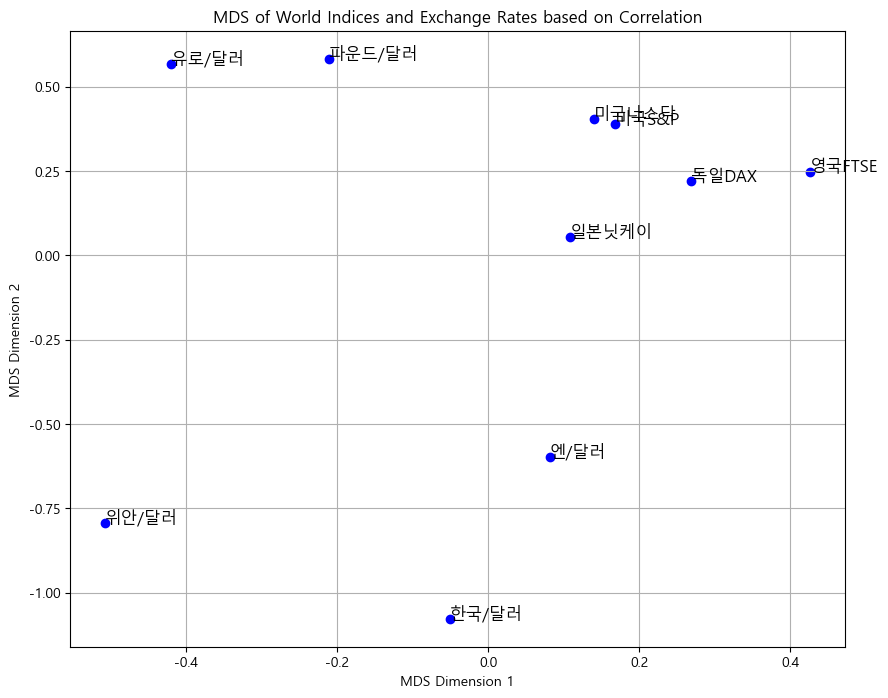

In [11]:
# 5. 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(mds_fit[:, 0], mds_fit[:, 1], color='blue')

# 각 지수와 환율의 이름 표시
for i, ticker in enumerate(df_month.columns):
    plt.text(mds_fit[i, 0], mds_fit[i, 1], ticker, fontsize=12)

plt.title('MDS of World Indices and Exchange Rates based on Correlation')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

### 2. 스트레스 값 확인하기

In [13]:
mds.stress_

0.22071214541969236

### 3. 일별데이터로 진행했을 때 MDS결과

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 다운로드 (세계 지수와 환율)
tickers = ['^GSPC', '^IXIC', '^N225', '^GDAXI', '^FTSE', 'USDKRW=X', 'EURUSD=X', 'JPY=X', 'GBPUSD=X', 'CNY=X']
data = yf.download(tickers, start='2010-01-01', end='2024-01-01')['Adj Close']
data.columns = [ '위안/달러', '유로/달러', '파운드/달러', '엔/달러', '한국/달러', '영국FTSE', '독일DAX','미국S&P', '미국나스닥', '일본닛케이' ]


# 2. 결측치 제거 및 수익률 계산
data = data.dropna()
returns = data.pct_change().dropna()  # 일일 수익률

# 3. 상관관계 매트릭스 계산
correlation_matrix = data.corr()

# 4. MDS 수행
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
dissimilarity = 1 - correlation_matrix  # 상관관계를 거리로 변환
mds_fit = mds.fit_transform(dissimilarity)

[*********************100%%**********************]  10 of 10 completed


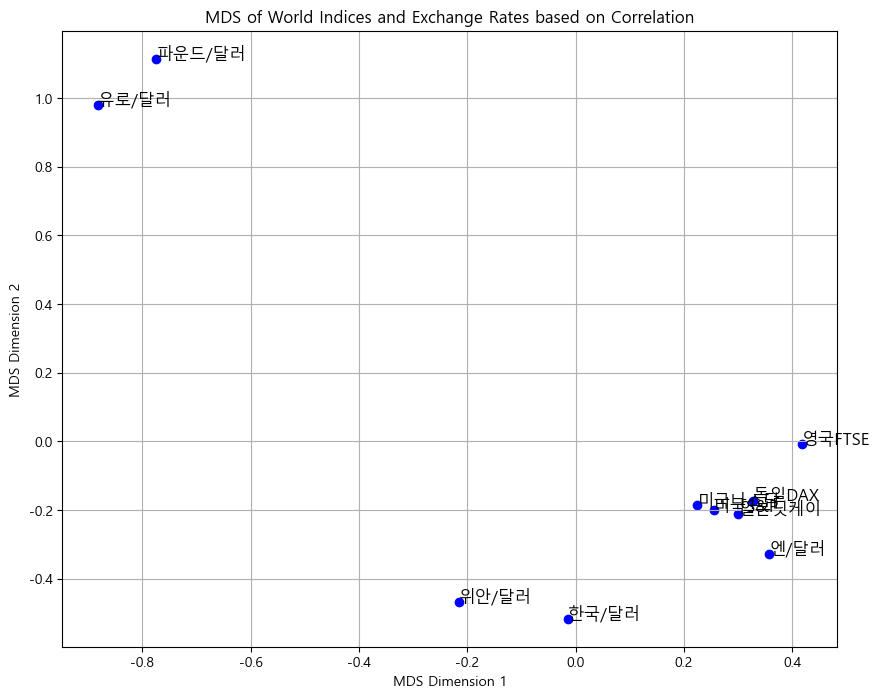

In [17]:
# 5. 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(mds_fit[:, 0], mds_fit[:, 1], color='blue')

# 각 지수와 환율의 이름 표시
for i, ticker in enumerate(df_month.columns):
    plt.text(mds_fit[i, 0], mds_fit[i, 1], ticker, fontsize=12)

plt.title('MDS of World Indices and Exchange Rates based on Correlation')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [18]:
mds.stress_

0.14780590000646274